In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

In [3]:
X, y = data[:, 1:], data[:, 0]

In [4]:
y_hot = OneHotEncoder().fit_transform(y.reshape(-1, 1)).todense()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [6]:
X_train.shape

(13399, 784)

In [7]:
y_train.shape

(13399, 10)

In [8]:
model = Sequential()
model.add(Dense(800, input_shape=(784,), activation="sigmoid", name ="l1"))
model.add(Dense(400, activation="sigmoid", name ="l2"))
model.add(Dense(200, activation="sigmoid", name="l3"))
model.add(Dense(100, activation="sigmoid", name="l4"))
model.add(Dense(50, activation="sigmoid", name="l5"))
model.add(Dense(25, activation="softmax", name="l6"))
model.add(Dense(10, activation="softmax", name="l7"))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 800)               628000    
_________________________________________________________________
l2 (Dense)                   (None, 400)               320400    
_________________________________________________________________
l3 (Dense)                   (None, 200)               80200     
_________________________________________________________________
l4 (Dense)                   (None, 100)               20100     
_________________________________________________________________
l5 (Dense)                   (None, 50)                5050      
_________________________________________________________________
l6 (Dense)                   (None, 25)                1275      
_________________________________________________________________
l7 (Dense)                   (None, 10)               

In [10]:
model.compile(optimizer='adam',
     loss='categorical_crossentropy',
    metrics=['accuracy'])

In [15]:
output = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
13399/13399 [==============================] - 4s 307us/step - loss: 0.4518 - accuracy: 0.8617
Epoch 2/10
13399/13399 [==============================] - 4s 307us/step - loss: 0.4597 - accuracy: 0.8599
Epoch 3/10
13399/13399 [==============================] - 4s 307us/step - loss: 0.4411 - accuracy: 0.8663
Epoch 4/10
13399/13399 [==============================] - 4s 306us/step - loss: 0.4486 - accuracy: 0.8643
Epoch 5/10
13399/13399 [==============================] - 4s 306us/step - loss: 0.4450 - accuracy: 0.8635
Epoch 6/10
13399/13399 [==============================] - 4s 312us/step - loss: 0.4390 - accuracy: 0.8652
Epoch 7/10
13399/13399 [==============================] - 4s 314us/step - loss: 0.4352 - accuracy: 0.8641
Epoch 8/10
13399/13399 [==============================] - 4s 311us/step - loss: 0.4427 - accuracy: 0.8630
Epoch 9/10
13399/13399 [==============================] - 4s 312us/step - loss: 0.4464 - accuracy: 0.8608
Epoch 10/10
13399/13399 [=====================

In [16]:
model.evaluate(X_test, y_test, verbose=0)

[0.5623520962758498, 0.8436363339424133]

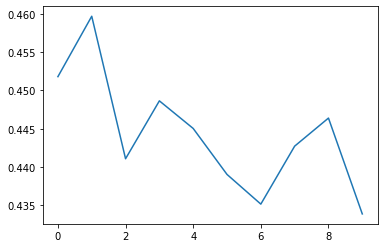

In [17]:
plt.plot(output.history["loss"])

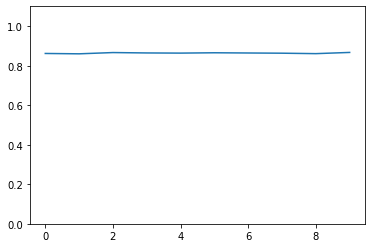

In [18]:
plt.figure()
plt.plot(output.history["accuracy"])
plt.ylim(0, 1.1)
plt.show()

In [19]:
model.predict(X_test[:10]).argmax(axis=1)

array([7, 7, 0, 9, 4, 3, 4, 6, 9, 2])

In [20]:
y_test[:10].argmax(axis=1)

matrix([[7],
        [7],
        [0],
        [9],
        [4],
        [5],
        [4],
        [6],
        [9],
        [2]])

In [21]:
from PIL import Image

array([[7, 1, 9, 4, 0, 8, 6, 5, 3, 2]])

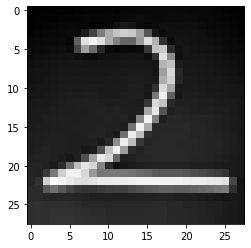

In [28]:
one = Image.open("../datasets/nums/two.jpeg")

small = one.resize(size=(28, 28))

img = 255 - np.array(small).mean(axis=2)

plt.imshow(img, cmap="gray")

model.predict(np.array([img.flatten()])).argsort(axis=1)